In [13]:
%%writefile Observation.py


print('imported Observation')
#Observe

from InitializationVariables import *
from NeuralNetwork import activationNodeCount, sensorNodeCount

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import numpy as np
import networkx as nx


barrier_cmap = ListedColormap(['none', 'darkgray'])
alive_cmap = ListedColormap(['none', 'green'])


    
    
def observe(environment, observed_Agents, barrierMask, survivalMask, colorScale):
    for agent in observed_Agents:
        x = agent.xCoord
        y = agent.yCoord
        color = [tempColor * (255/(2*colorScale)) + 255/2 for tempColor in agent.color]
        environment[x, y] = color   # Note: (y, x) to match NumPy array indexing
    # Plot the grid with agents
    plt.imshow(environment, interpolation='none')
    plt.imshow(barrierMask, cmap=barrier_cmap, alpha=0.8, interpolation='none')
    plt.imshow(survivalMask, cmap=alive_cmap, alpha=0.2, interpolation='none')

    # Add grid lines for better visualization
#     plt.grid(True, which='both', color='black', linewidth=0.5)
    plt.show()
    
    
def getAgentAnalysis(agents):
    sensorbuckets = np.zeros(sensorNodeCount)
    activebuckets = np.zeros(activationNodeCount)
    weightbuckets = np.zeros(100)

    for agent in agents:
        for edge in agent.agentBrain.network:
            sensorbuckets[int(edge[0])-1] = sensorbuckets[int(edge[0])-1] + 1 
            activebuckets[int(edge[1])-1] = activebuckets[int(edge[1])-1] + 1 
            weightbuckets[int(edge[2])] = int(weightbuckets[int(edge[2])] + 1 )
    return sensorbuckets, activebuckets, weightbuckets

def printBucketAnalysis(sensorbuckets, activebuckets, weightbuckets):
    for i in range(len(activebuckets)):
        print(f'{activeBucketTypes[i]} has {activebuckets[i]}')

    print( ' - - - - - - - - ')
    for i in range(len(sensorbuckets)):
        print(f'{sensorTypes[i]} has {sensorbuckets[i]}')
        
activeBucketTypes = [
    'No Movement',
    'Move East',
    'Move North',
    'Move NorthEast',
    'Move West',
    'Move South',
    'Move SouthWest',
    'Move NorthWest',
    'Move SouthEast',
    'forward',
    'backwards',
    'turnCC',
    'turnC',
    'kill'
]

sensorTypes = [
    'getLoc_X',
    'getLoc_Y',
    'getBoundary_Dist_x',
    'getBoundary_Dist',
    'getBoundary_Dist_y',
    'getYouth',
    'getLast_Move_X',
    'getLast_Move_Y',
    'getPopulationForward',
    'getBarrierForward',
    'getPopulationDensity',
    'getPopulationGradient_xDirection',
    'getPopulationGradient_yDirection',
    'getOscilatorVal',
    'getAge',
    'getBarrierDistForward',
    'getFacingX',
    'getFacingY',
    'getRandom',
    'getPheramones',
    'getPheramonesForward',
    'getDistToBarrier'
]

def plotNeuralNetwork(agent):
    # Create a bipartite graph
    G = nx.Graph()

    # Add sensor and action nodes with bipartite attribute
    G.add_nodes_from(activeBucketTypes, bipartite=0, node_type='action')
    G.add_nodes_from(sensorTypes, bipartite=1, node_type='sensor')

    for edge in agent.agentBrain.network:
        sensor, action, strength = edge
        G.add_edge(sensorTypes[int(sensor)], activeBucketTypes[int(action)], weight=strength)

    # Separate nodes by bipartite set
    sensor_nodes = {node for node, data in G.nodes(data=True) if data['bipartite'] == 1}
    action_nodes = set(G) - sensor_nodes

    fig, ax = plt.subplots(figsize=(10, 20))

    # Customize edge thickness and color based on weights
    edges = G.edges(data=True)
    weights = [data['weight'] for _, _, data in edges]
    edge_colors = plt.cm.RdYlGn([(weight) / 100 for weight in weights])

    # Draw the bipartite graph with customized edge attributes
    pos = nx.bipartite_layout(G, sensor_nodes)
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue',
            font_color='black', font_size=10, node_size=800,
            width=3, edge_color=edge_colors, edge_cmap=plt.cm.RdYlGn)

    # Display the plot
    plt.show()

Overwriting Observation.py


In [6]:

weights = [0, 10,50, 80, 100]
edge_colors = plt.cm.RdYlGn([(weight) / 100 for weight in weights])


In [7]:
edge_colors

array([[0.64705882, 0.        , 0.14901961, 1.        ],
       [0.83929258, 0.18454441, 0.15286428, 1.        ],
       [0.99707805, 0.9987697 , 0.74502115, 1.        ],
       [0.4       , 0.74117647, 0.38823529, 1.        ],
       [0.        , 0.40784314, 0.21568627, 1.        ]])

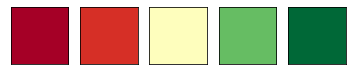

In [8]:
for i, color in enumerate(edge_colors):
    plt.subplot(1, len(edge_colors), i + 1)
    plt.imshow([[color]], extent=[0, 1, 0, 1])
    plt.xticks([])
    plt.yticks([])